In [9]:
import cv2
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import copy as cp
import numpy as np
import math
import keras

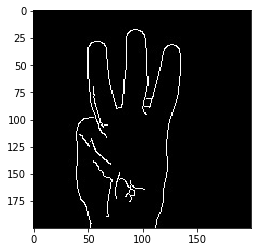

In [71]:
img = cv2.imread('test5.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap = 'gray')

In [72]:
contours, hierarchy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#plt.imshow(contours,cmap = 'gray')

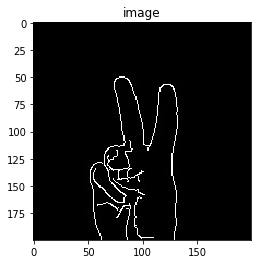

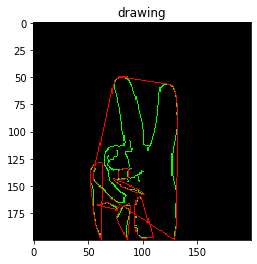

(Text(0.5, 1.0, 'Drawing'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

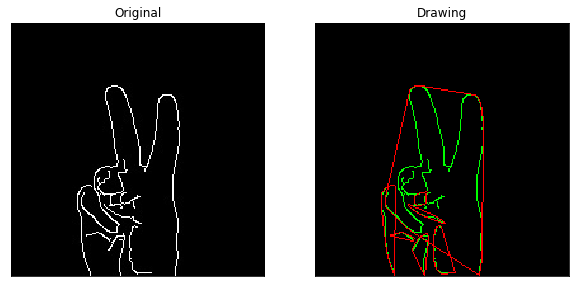

In [73]:

img = cv2.imread('test8.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#blur = cv2.GaussianBlur(gray,(5,5),0)


gray[gray >= 128]= 255
gray[gray < 128] = 0

edges = gray
# edges = cv2.Canny(blur,255,200)
drawing = np.zeros(img.shape,np.uint8)     # Image to draw the contours
contours,hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    hull = cv2.convexHull(cnt)
    cv2.drawContours(drawing,[cnt],0,(0,255,0),1)   # draw contours in green color
    cv2.drawContours(drawing,[hull],-1,(255,0,0),1)  # draw contours in red color

plt.title('image')  
plt.imshow(img,cmap = 'gray')
plt.show()
# plt.title('blur')  
# plt.imshow(blur,cmap = 'gray')
# plt.show()
# plt.title('egdes') 
# plt.imshow(edges,cmap = 'gray')
# plt.show()
plt.title('drawing') 
plt.imshow(drawing,cmap = 'gray')
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(drawing,cmap = 'gray')
plt.title('Drawing'), plt.xticks([]), plt.yticks([])

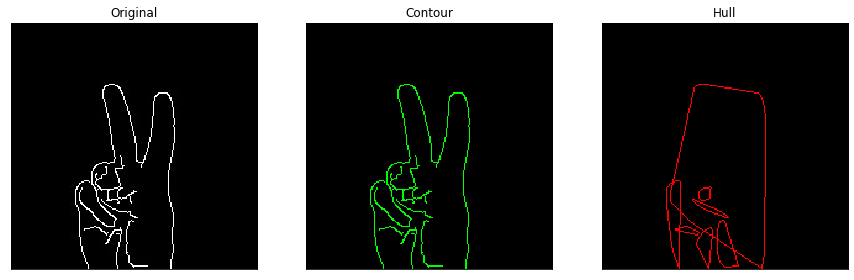

In [74]:
def test(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                    
    gray[gray >= 128]= 255
    gray[gray < 128] = 0

    edges = gray
    drawing = np.zeros(img.shape,np.uint8)
    drawing2 = np.zeros(img.shape,np.uint8)# Image to draw the contours
    contours,hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        hull = cv2.convexHull(cnt)
        cv2.drawContours(drawing,[cnt],0,(0,255,0),1)   # draw contours in green color
        cv2.drawContours(drawing2,[hull],0,(255,0,0),1)  # draw contours in red color

    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,3,2),plt.imshow(drawing,cmap = 'gray')
    plt.title('Contour'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,3,3),plt.imshow(drawing2,cmap = 'gray')
    plt.title('Hull'), plt.xticks([]), plt.yticks([])
    
img = cv2.imread('test8.jpg')
test(img)

(Text(0.5, 1.0, 'Hull'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

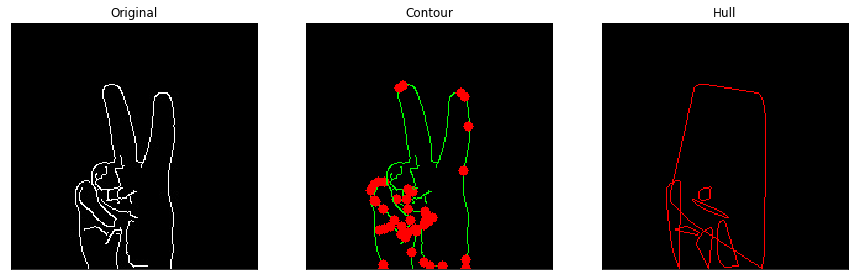

In [132]:

img = cv2.imread('test8.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#blur = cv2.GaussianBlur(gray,(5,5),0)


gray[gray >= 128]= 255
gray[gray < 128] = 0

edges = gray
drawing = np.zeros(img.shape,np.uint8)
drawing2 = np.zeros(img.shape,np.uint8)# Image to draw the contours
contours,hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    
    hull = cv2.convexHull(cnt,returnPoints=False)
    hull2 = cv2.convexHull(cnt)
    cv2.drawContours(drawing,[cnt],0,(0,255,0),1)   # draw contours in green color
    cv2.drawContours(drawing2,[hull2],0,(255,0,0),1)  # draw contours in red color
    
    if len(hull) > 2:
        defects = cv2.convexityDefects(cnt, hull)
        if type(defects) != type(None):  # avoid crashing.   (BUG not found)

            count = 0
            for i in range(defects.shape[0]):  # calculate the angle
                s, e, f, d = defects[i][0]
                start = tuple(cnt[s][0])
                end = tuple(cnt[e][0])
                far = tuple(cnt[f][0])
                a = math.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
                b = math.sqrt((far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2)
                c = math.sqrt((end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2)
                angle = math.acos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c))  # cosine theorem
                if angle <= math.pi / 1:  # angle less than 90 degree, treat as fingers
                    count += 1
                    cv2.circle(drawing, far, 1, [255, 0, 0], 5)

                    
plt.figure(figsize=(15,15))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(drawing,cmap = 'gray')
plt.title('Contour'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(drawing2,cmap = 'gray')
plt.title('Hull'), plt.xticks([]), plt.yticks([])

# if ((angle <= math.pi / 1)and(angle > math.pi / 100)):  # angle less than 90 degree, treat as fingers
#                     count += 1
#                     cv2.circle(drawing, far, 1, [255, 0, 0], 5)

                    


(Text(0.5, 1.0, 'Contour'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

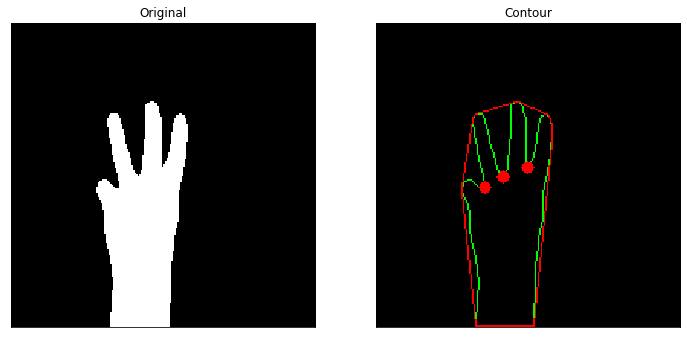

In [115]:
img = cv2.imread('testw.jpg')
blur = cv2.GaussianBlur(img,(5,5),0)
gray = cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)


for i in range(200):
    for j in range(200):
        if(gray[i,j])>128:
            gray[i,j]=0
        else:
            gray[i,j]=255
            


edges = gray
drawing = np.zeros(img.shape,np.uint8)
drawing2 = np.zeros(img.shape,np.uint8)# Image to draw the contours
contours,hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    
    hull = cv2.convexHull(cnt,returnPoints=False)
    hull2 = cv2.convexHull(cnt)
    cv2.drawContours(drawing,[cnt],0,(0,255,0),1)   # draw contours in green color
    cv2.drawContours(drawing,[hull2],0,(255,0,0),1)  # draw contours in red color
    
    if len(hull) > 2:
        defects = cv2.convexityDefects(cnt, hull)
        if type(defects) != type(None):  # avoid crashing.   (BUG not found)

            count = 0
            for i in range(defects.shape[0]):  # calculate the angle
                s, e, f, d = defects[i][0]
                start = tuple(cnt[s][0])
                end = tuple(cnt[e][0])
                far = tuple(cnt[f][0])
                a = math.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
                b = math.sqrt((far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2)
                c = math.sqrt((end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2)
                angle = math.acos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c))  # cosine theorem
                if angle <= math.pi / 2:  # angle less than 90 degree, treat as fingers
                    count += 1
                    cv2.circle(drawing, far, 1, [255, 0, 0], 5)

                    
# plt.figure(figsize=(15,15))
# plt.subplot(1,3,1),plt.imshow(gray,cmap = 'gray')
# plt.title('Original'), plt.xticks([]), plt.yticks([])
# plt.subplot(1,3,2),plt.imshow(drawing,cmap = 'gray')
# plt.title('Contour'), plt.xticks([]), plt.yticks([])
# plt.subplot(1,3,3),plt.imshow(drawing2,cmap = 'gray')
# plt.title('Hull'), plt.xticks([]), plt.yticks([])

                    
plt.figure(figsize=(12,12))
plt.subplot(1,2,1),plt.imshow(gray,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(drawing,cmap = 'gray')
plt.title('Contour'), plt.xticks([]), plt.yticks([])

In [8]:
#import os, cv2, skimage
#from skimage.transform import resize
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D, Dense, Dropout, Flatten, Input, Add, GlobalAveragePooling2D, DepthwiseConv2D, BatchNormalization, LeakyReLU
from keras.models import Model
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import tensorflow




net = Conv2D(32, kernel_size=3, strides=1, padding="same")(inputs)
net = LeakyReLU()(net)
net = Conv2D(32, kernel_size=3, strides=1, padding="same")(net)
net = LeakyReLU()(net)
net = Conv2D(32, kernel_size=3, strides=2, padding="same")(net)
net = LeakyReLU()(net)

net = Conv2D(32, kernel_size=3, strides=1, padding="same")(net)
net = LeakyReLU()(net)
net = Conv2D(32, kernel_size=3, strides=1, padding="same")(net)
net = LeakyReLU()(net)
net = Conv2D(32, kernel_size=3, strides=2, padding="same")(net)
net = LeakyReLU()(net)

shortcut = net

net = DepthwiseConv2D(kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(net)
net = BatchNormalization(axis=3)(net)
net = LeakyReLU()(net)
net = Conv2D(filters=32, kernel_size=1, strides=1, padding='same', kernel_initializer='he_normal')(net)
net = BatchNormalization(axis=3)(net)
net = LeakyReLU()(net)

net = DepthwiseConv2D(kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(net)
net = BatchNormalization(axis=3)(net)
net = LeakyReLU()(net)
net = Conv2D(filters=32, kernel_size=1, strides=1, padding='same', kernel_initializer='he_normal')(net)
net = BatchNormalization(axis=3)(net)
net = LeakyReLU()(net)

net = Add()([net, shortcut])

net = GlobalAveragePooling2D()(net)
net = Dropout(0.2)(net)

net = Dense(128, activation='relu')(net)
outputs = Dense(num_classes, activation='softmax')(net)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

model.summary()

Using TensorFlow backend.
W0708 14:23:49.338744  4604 deprecation_wrapper.py:119] From d:\ve\test-env\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



NameError: name 'inputs' is not defined